<a href="https://colab.research.google.com/github/Shiv-am-19/LIVE_STOCK_PRICE_PREDICTION/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Get 1-day, 1-minute interval stock data
df = yf.download("TSLA", period="1d", interval="1m")
df = df[['Close']]
df.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [24]:
# Calculate moving averages
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

# Generate Buy (1) / Sell (-1) signals
df['Signal'] = 0
df.loc[df['SMA20'] > df['SMA50'], 'Signal'] = 1
df.loc[df['SMA20'] < df['SMA50'], 'Signal'] = -1

# Find changes (entry points)
df['Position'] = df['Signal'].diff()


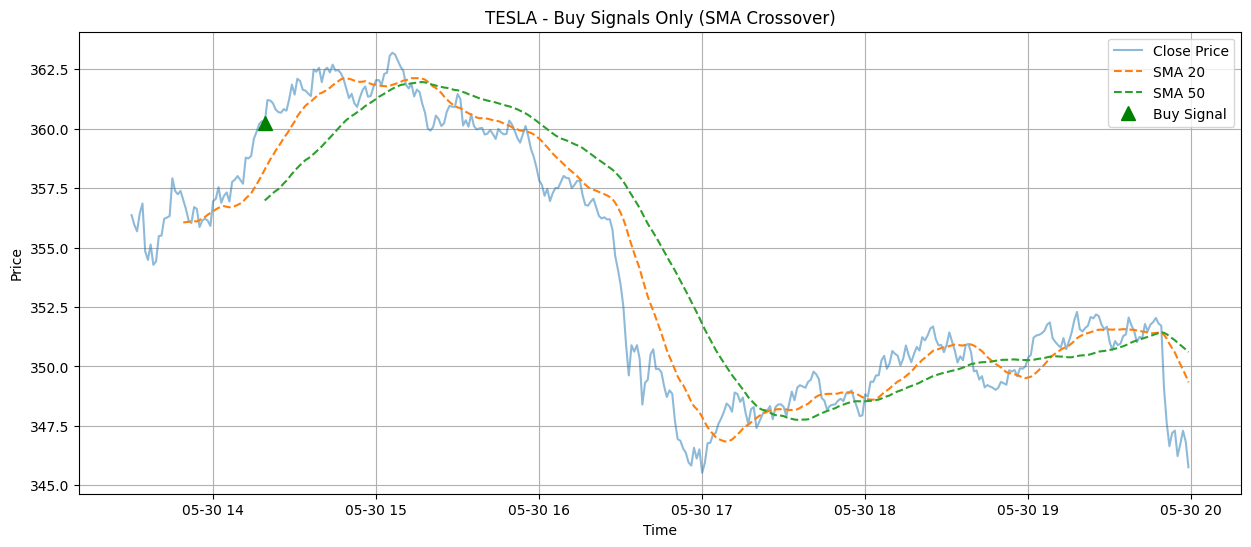

In [25]:
plt.figure(figsize=(15,6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA20'], label='SMA 20', linestyle='--')
plt.plot(df['SMA50'], label='SMA 50', linestyle='--')

# Plot ONLY Buy points
plt.plot(df[df['Position'] == 1].index,
         df['Close'][df['Position'] == 1],
         '^', markersize=10, color='green', label='Buy Signal')

plt.title("TESLA - Buy Signals Only (SMA Crossover)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


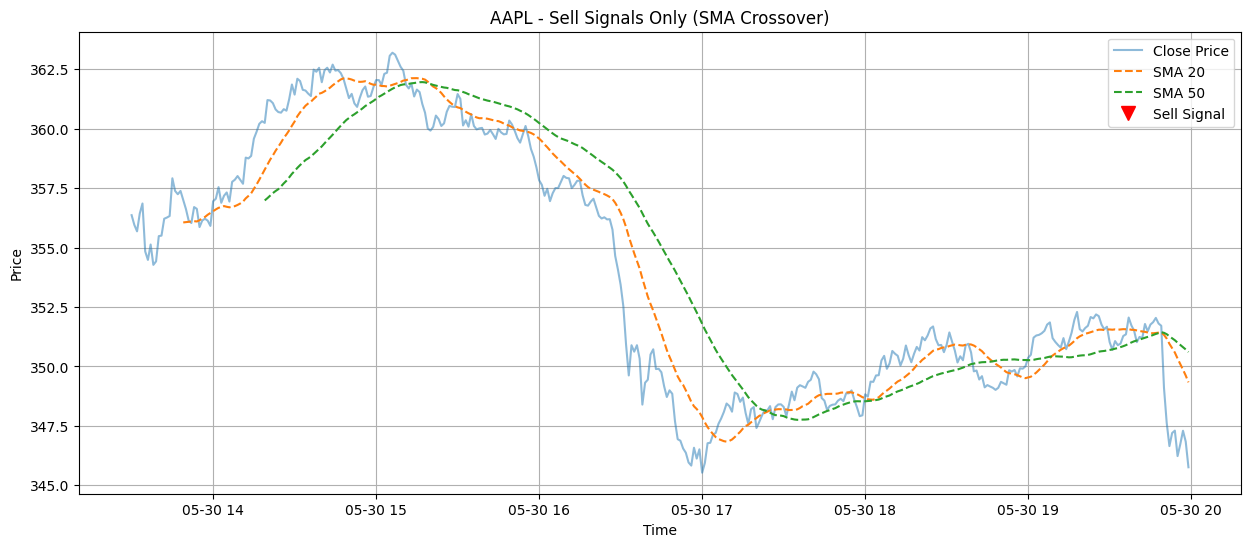

In [26]:
plt.figure(figsize=(15,6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA20'], label='SMA 20', linestyle='--')
plt.plot(df['SMA50'], label='SMA 50', linestyle='--')

# Plot ONLY Sell points
plt.plot(df[df['Position'] == -1].index,
         df['Close'][df['Position'] == -1],
         'v', markersize=10, color='red', label='Sell Signal')

plt.title("AAPL - Sell Signals Only (SMA Crossover)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
